In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_json('data.json',orient='split')
Data=data.copy()

#Drop the client time column as it does not affect whether the user is interested or not
Data=Data.drop('client_time',axis=1) 

#Collect the indexes of the rows of the Categories that are not Sports or Environment
category_index_tech=Data[Data['category']== 'Technology'].index 
category_index_fashion=Data[Data['category']== 'Fashion'].index 
category_index_games=Data[Data['category']== 'Games'].index 

#Drop the rows of the Tech, Fashion and Games category.
Data=Data.drop(category_index_tech)
Data=Data.drop(category_index_fashion)
Data=Data.drop(category_index_games)

#Extract the location objects from the location column
locations=Data.iloc[:,7]
locations.tolist()
zipcodes=[]
cities=[]
states=[]

#Extract zipcodes, city and state from the location object and place them as columns in the dataset
for i in locations:
  zipcodes.append(i['zip_code'])
  cities.append(i['city'])
  states.append(i['state'])
Data.insert(7,"zip",zipcodes)
Data.insert(7,"city",cities)
Data.insert(7,"state",states)

#Location object column can be dropped now since we are not using any other elemnts from it.
Data=Data.drop('location',axis=1)

Data.head()

#Create 2 seperate dataframes for View Project and Fund Project event.
Data_VP=Data[Data['event_name']=='View Project']
Data_FP=Data[Data['event_name']=='Fund Project']

#Drop the amount column since our analysis is based on the assumption that
#the amount does not matter as long as the user is funding the project.
Data_VP=Data_VP.drop('amount',axis=1)







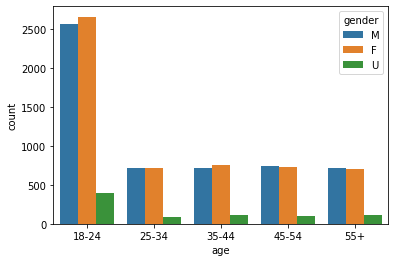

In [60]:
sns.countplot(data=Data_VP,x='age',hue='gender',order=['18-24','25-34','35-44','45-54','55+'])

#This Graph on the Dataset of people who View Product shows that the Age Group of 18-24
#is the most likely group to view the products in Environment and Sports categories.
#The Ratio of male to female is almost 1 and can be neglected.

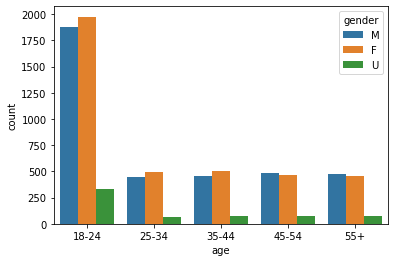

In [31]:
sns.countplot(data=Data_FP,x='age',hue='gender',order=['18-24','25-34','35-44','45-54','55+'])
#This Graph on the Dataset of people who Fund Product shows that the Age Group of 18-24
#is the most likely group to fund the products in Environment and Sports categories.
#The Ratio of male to female is almost 1 and can be neglected.



In [ ]:
#Since the 2 graphs above are similar, there are no noteable variations in the age group or gender
#of people who View Products and people who Fund them except that people who view the product
#are greater than those who fund.

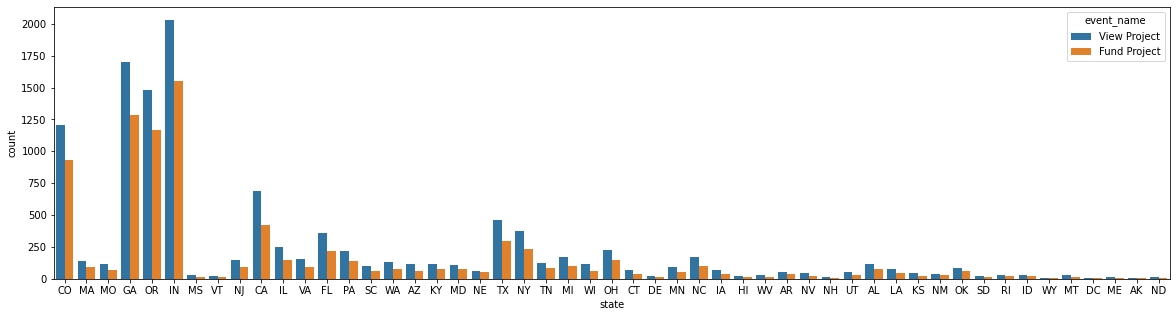

In [43]:
plt.figure(figsize=(20,5))
sns.countplot(data=Data,x='state',hue='event_name')


#This graph below clearly points out the trend that the US states with code CO, GA, OR and IN
#i.e (Colorado,Georgia,Oregon and Indiana) are the most active states for people interersted
#in the Sports and Environment Categories.

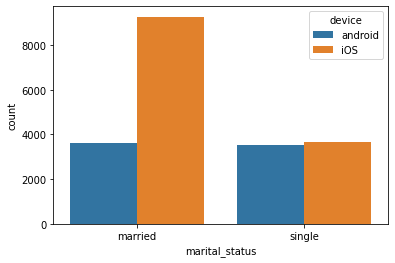

In [49]:
sns.countplot(data=Data,x='marital_status',hue='device')


#This graph below shows that married people altogether could be more interested in the product than single
#Also, IOS users are more active for these categories than android users

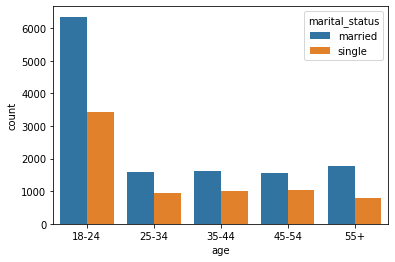

In [63]:
sns.countplot(data=Data,x='age',hue='marital_status',order=['18-24','25-34','35-44','45-54','55+'])

#This graph below still clearly holds that age group 18-24 and married people could be more
#interested than other age groups and singles.

In [ ]:
#Collectively, are analysis concludes that:
#1. Age 18-24
#2. Married
#3. From states Colorado,Indiana,Oregon and Georgia
#4. IOS users
# can be the target audience and the most interested people for our bicycle project.